In [ ]:
from load_data import cleanDS_Store
from data_loader import dataLoader
from training import train
import torch
import time

torch.manual_seed(99)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

full_path = './content/WoShuyi/lips/'
base_path = full_path
cleanDS_Store(base_path)
train_loader, valid_loader, test_loader = dataLoader(base_path)

start_time = time.time()
# model_types = ['customresnet','resnet50','resnet18', 'smallcnn']
folder_name = './results/results_2024-05-15-smallcnn/'
train_losses, valid_losses, model_path = train(folder_name, train_loader, valid_loader, model_type = 'smallcnn', num_epochs = 50, learning_rate = 0.001, pretrained=False)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

elapsed_time_minutes = elapsed_time / 60

print(f"Training time: {elapsed_time_minutes:.2f} minutes")

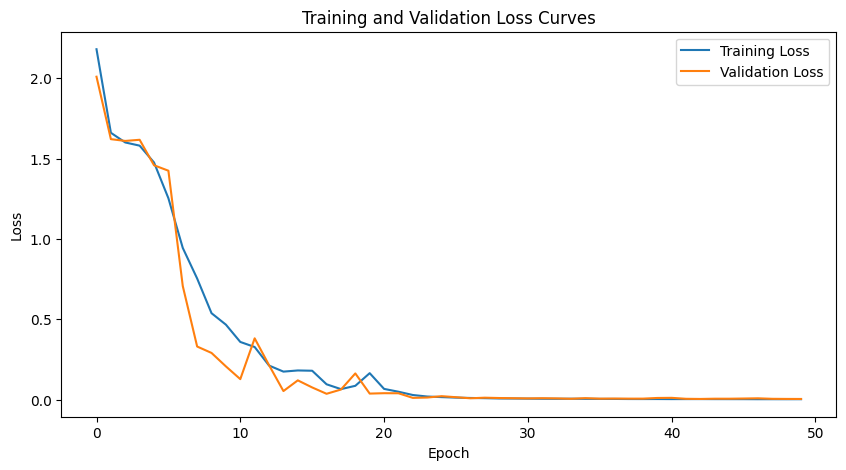

training:  96 test:  12 validation:  12
Test Accuracy: 100.00%


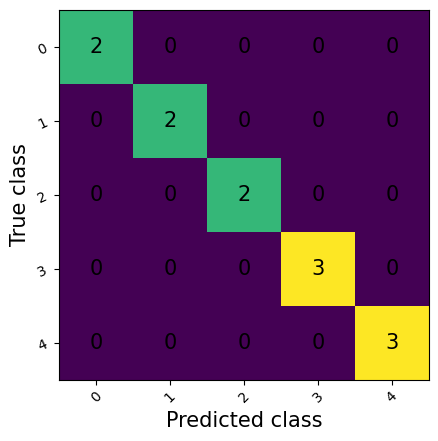

In [1]:
from evaluations import plotLossGraph, evaluation
from data_loader import dataLoader, original_dataLoader
from show_images import show_all_images
import os
import torch
from load_data import cleanDS_Store
torch.manual_seed(99)

# read the txt file from results folder
result_folder = './results/results_2024-05-15-smallcnn'
train_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'train_losses.txt'),'r')]
valid_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'valid_losses.txt'),'r')]
plotLossGraph(train_losses,valid_losses)

full_path = './content/WoShuyi/lips/'
base_path = full_path
cleanDS_Store(base_path)
train_loader, valid_loader, test_loader = dataLoader(base_path)

model_path = os.path.join(result_folder,'best.pth')

model, test_plots = evaluation(test_loader, model_path, model_type = 'smallcnn')

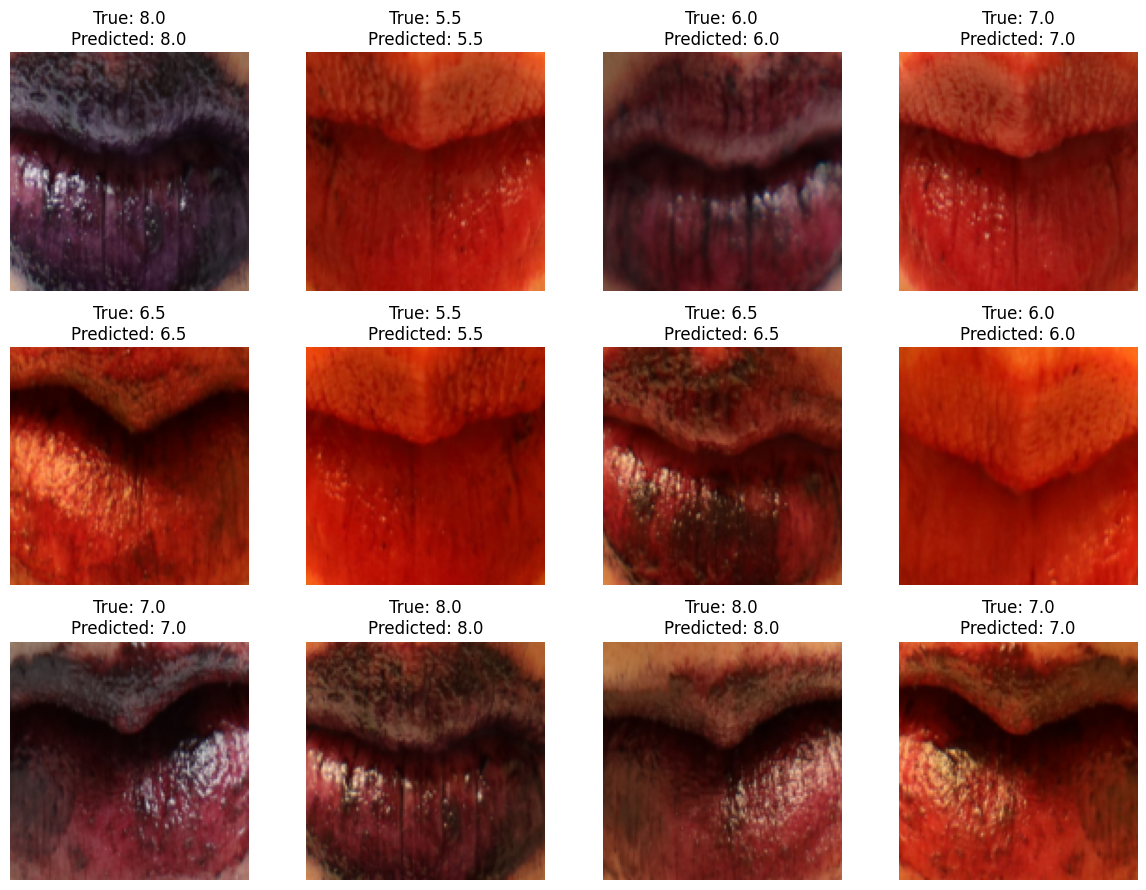

In [2]:
from show_images import show_evaluation_images
class_labels = ['5.5','6.0','6.5','7.0','8.0']
show_evaluation_images(test_plots, base_path, class_labels=class_labels, num_cols=4)

Test Accuracy: 20.00%


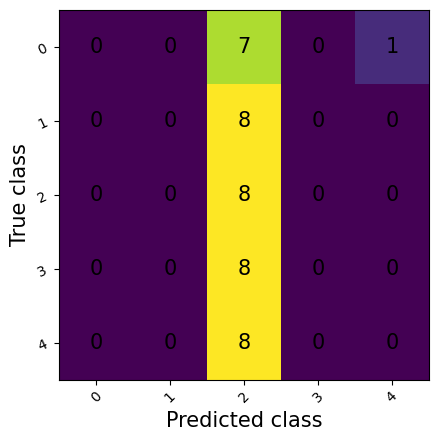

In [5]:
from data_loader import api_dataLoader
full_path = './content/TestShuyi/lips/'
base_path = full_path
cleanDS_Store(base_path)
model_path = os.path.join(result_folder,'best.pth')

loader = api_dataLoader(base_path)
model, test_plots = evaluation(loader, model_path, model_type = 'smallcnn')


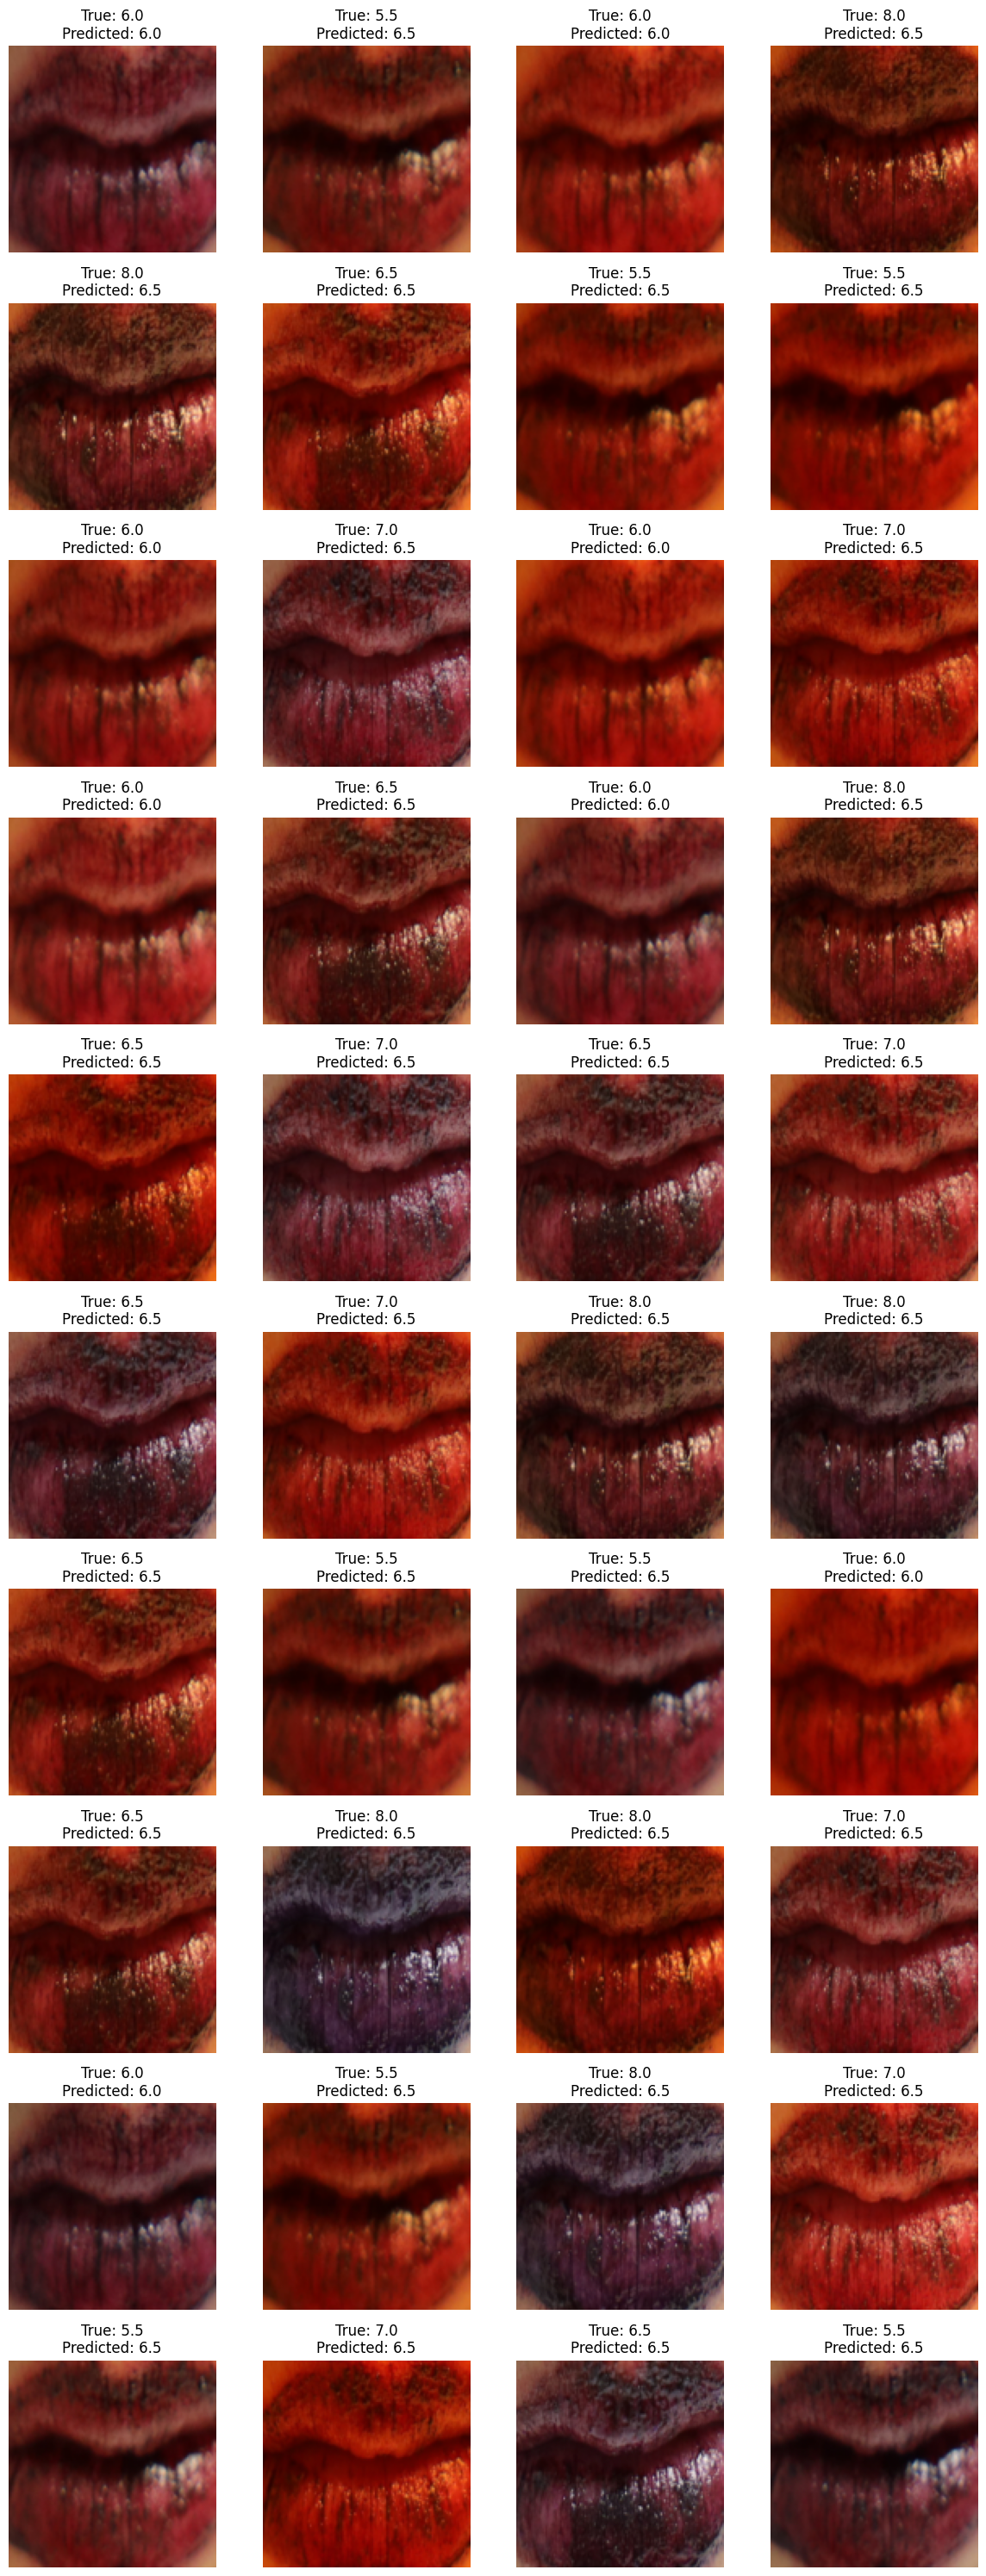

In [8]:
from show_images import show_evaluation_images
class_labels = ['5.5','6.0','6.5','7.0','8.0']
show_evaluation_images(test_plots, base_path, class_labels=class_labels, num_cols=4)